# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [6]:
# Your code here. 

import pandas as pd
student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10],
                             'Age': [17,51,27,21,36,48,19,26,54,30],
                            'Tardies' : [10,1,5,9,4,2,9,6,0,3]})

student_data.head()

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4


Draw a dispersion diagram (scatter plot) for the data.

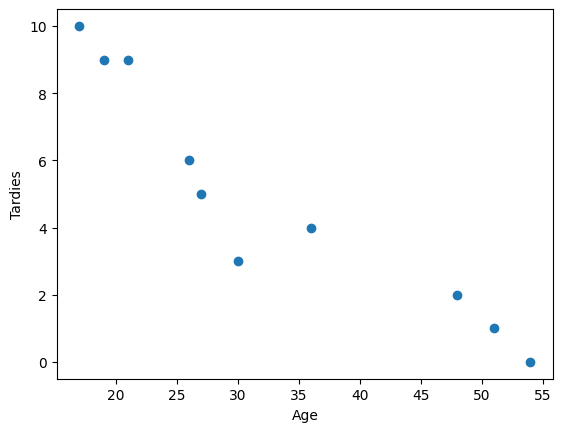

In [9]:
# Your code here.

import matplotlib.pyplot as plt

plt.scatter(student_data['Age'], student_data['Tardies'])

plt.xlabel('Age')
plt.ylabel('Tardies')

# Mostrar el gráfico
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 

# Parece que cuanto más joven es el alumno, más tarde llega, tal y como se mencionaba en el enunciado.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [14]:
# Your response here.

covariance_matrix = student_data.cov()
print("Matriz de covarianza:")
print(covariance_matrix)

Matriz de covarianza:
           StudentID         Age    Tardies
StudentID   9.166667    7.722222  -3.722222
Age         7.722222  187.655556 -45.566667
Tardies    -3.722222  -45.566667  12.544444


In [11]:
correlation_matrix = student_data.corr()
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
           StudentID       Age   Tardies
StudentID   1.000000  0.186190 -0.347113
Age         0.186190  1.000000 -0.939163
Tardies    -0.347113 -0.939163  1.000000


In [ ]:
# En el caso de la covarianza vemos que la diagonal es positiva, por lo que las variables tienden a moverse en la misma dirección.
# En la correlación, vemos 1 y 1 , por lo que existe una perfecta correlacion entre las variables.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
# Your response here.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')


In [24]:
x = sm.add_constant(student_data.Age)

y = student_data.Tardies

modelo = sm.OLS(y, x).fit()

y_pred = modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 24 May 2023   Prob (F-statistic):           5.57e-05
Time:                        16:10:48   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# En esta tabla me fijo en el R-squared, y me dice que las variables están muy relacionadas entre sí.
# Si nos fijamos en Prob(F-statistic) vemos que es casi 0, por lo que tenemos evidencias para rechazar la hipótesis nula.

Plot your regression model on your scatter plot.

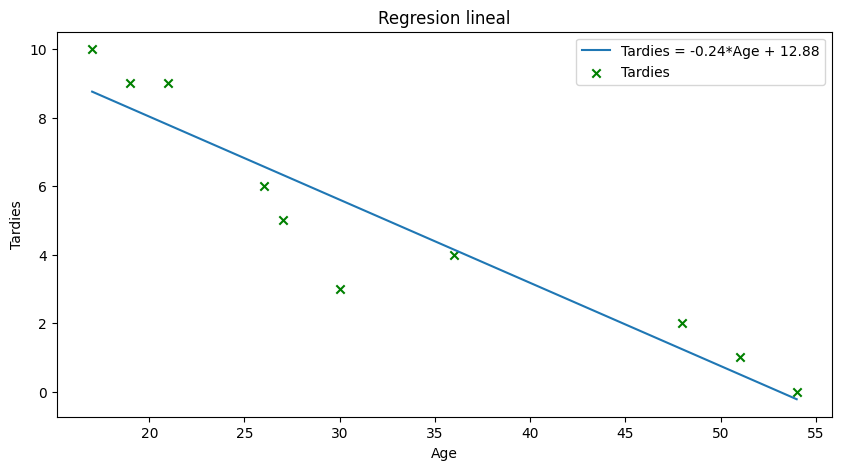

In [32]:
# Your code here.
import numpy as np
# plot

x=np.linspace(student_data.Age.min(), student_data.Age.max(), 10)

y= -0.2428*x + 12.8888	

plt.figure(figsize=(10, 5))


# la recta de ajuste
plt.plot(x, y, label=f'Tardies = {-0.24}*Age + {12.88}')


# datos
plt.scatter(student_data.Age, student_data.Tardies, marker='x', c='g', label='Tardies')


plt.title('Regresion lineal')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 

# Se supone que existe una regresión lineal entre Age y Tardies, quiere decir que cuanto más edad, menos retrasos.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [34]:
# Import any libraries you may need & the data

df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [50]:
# Your response here. 

list = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
correlaciones = df[list].corr()
correlaciones

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


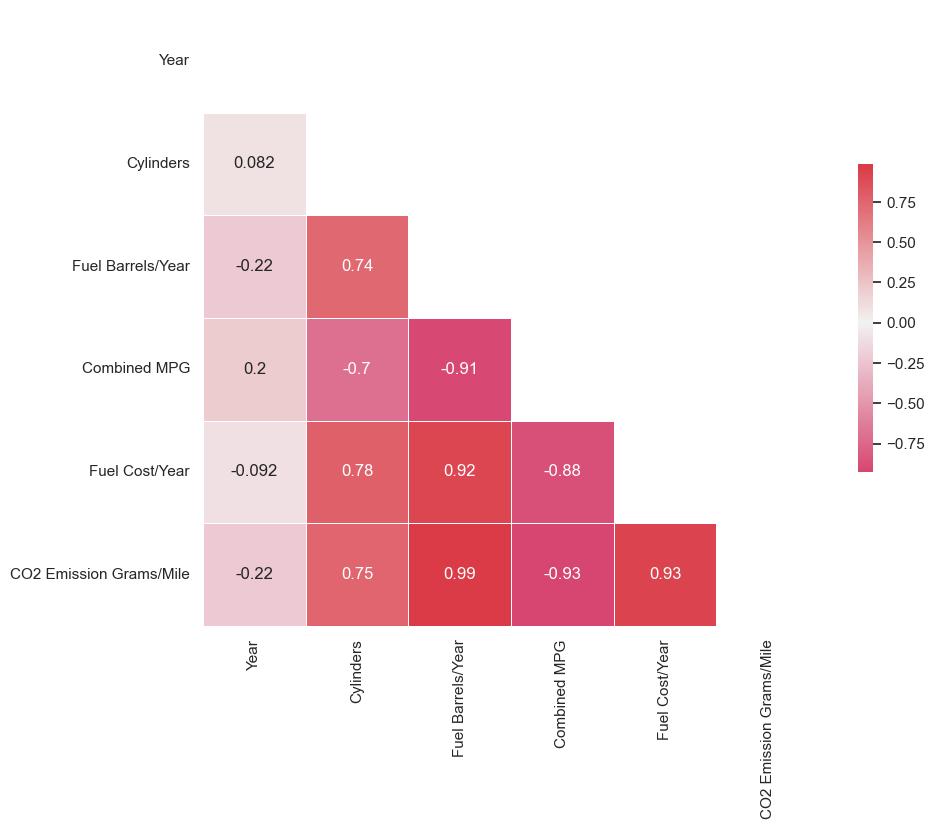

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

#Seleccionar las columnas numéricas del dataframe
columns = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

#Crear la figura y establecer el tamaño
plt.figure(figsize=(10, 8))

#Establecer el estilo de fondo
sns.set(style='white')

#Crear la máscara para la matriz triangular superior
mask = np.triu(np.ones_like(df[columns].corr(), dtype=bool))

#Crear la paleta de colores
cmap = sns.diverging_palette(0, 10, as_cmap=True)

#Crear el mapa de calor con las columnas numéricas
sns.heatmap(df[columns].corr(),
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

#Mostrar la figura
plt.show()

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [46]:
# Your response here. 

x = sm.add_constant(df[[

    'Year',
    'Cylinders',
    'Fuel Barrels/Year',
    'Combined MPG',
    'Fuel Cost/Year'

]].apply(lambda x: x.fillna(x.mean()))

)

y = df['CO2 Emission Grams/Mile']


modelo = sm.OLS(y, x).fit()

pred = modelo.predict(x)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [47]:
# Your response here. 

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                             17:11:23   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Podemos sacar las siguientes conclusiones:

# El coeficiente de determinación (R-cuadrado) es de 0.981, por lo tanto,
# el modelo es capaz de capturar y predecir la mayoría de la variabilidad en las emisiones de CO2.

# Las variables Year, Cylinders, Fuel Barrels/Year, Combined MPG y Fuel Cost/Year están incluidas en el modelo y todas tienen coeficientes significativos (p < 0.05). 
# Esto sugiere que todas estas variables tienen un impacto estadísticamente significativo en la predicción de las emisiones de CO2.

# El coeficiente para la variable Year es -0.3206. A medida que el año del vehículo aumenta, se espera que las emisiones de CO2 disminuyan.

# El coeficiente para la variable Cylinders es 1.8788. A medida que aumenta el número de cilindros, se espera un aumento en las emisiones de CO2.

# El coeficiente para la variable Fuel Barrels/Year es 19.0529. A medida que aumenta la cantidad de barriles de combustible consumidos, también aumentan las emisiones de CO2.

# El coeficiente para la variable Combined MPG es -3.0404. A medida que aumenta el consumo de combustible, se espera que las emisiones de CO2 disminuyan.

# El coeficiente para la variable Fuel Cost/Year es 0.0323. A medida que aumentan los costos de combustible, también aumentan las emisiones de CO2.

# En general, podemos concluir que las variables incluidas en el modelo tienen una influencia significativa en la predicción de las emisiones de CO2.
# Sin embargo, es importante tener en cuenta que el modelo asume ciertos supuestos y limitaciones, 
# y las conclusiones se basan en los datos y el contexto específicos utilizados en el análisis.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 